# PBH-$\beta$, a code to explore the constraints on PBH abundances and power spectrum.


**Authors:** [Tadeo D. Gómez](https://www.linkedin.com/in/tadeodaguilar/) & [Luis E. Padilla](https://www.linkedin.com/in/luis-enrique-padilla-albores-052087199/)

**Source:** [Source code at GitHub](https://github.com/TadeoDGAguilar/PBHBeta)

**Version:** [1.0.1](https://pypi.org/project/PBHBeta/)

**Licence:** [GNU General Public License v2.0](https://www.gnu.org/licenses/old-licenses/gpl-2.0.html). The documentation is licensed under the [GFDL](https://www.gnu.org/licenses/fdl-1.3.en.html).

---

In [1]:
from PBHBeta import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
functions.put_M_array(2.17645e-5, 1e20)

array([2.17645000e-05, 3.82939655e-05, 6.73770496e-05, ...,
       9.63604110e+19, 9.91285249e+19, 1.01976158e+20])

In [3]:
constraints.M_tot = constraints.data_M_tot
M_tot = np.array(constraints.M_tot)

In [4]:
omega=1/3

In [5]:
M_n, betas_dm, M_relic, betas_relic ,_  = functions.Betas_DM(M_tot,omega)
betas_bbn = functions.Betas_BBN(M_tot,omega)[1]
betas_sd = functions.Betas_SD(M_tot,omega)[1]
betas_an = functions.Betas_CMB_AN(M_tot,omega)[1]
betas_grb1 = functions.Betas_GRB(M_tot,omega)[2]
betas_grb2 = functions.Betas_GRB(M_tot,omega)[3]
betas_reio = functions.Betas_Reio(M_tot,omega)[1]
betas_lsp = functions.Betas_LSP(M_tot,omega)[1]
betas_full = functions.get_Betas_full(M_tot)

/Users/thaddaios/anaconda3/lib/python3.10/site-packages/PBHBeta/functions.py:86: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 = beta0 * b * (1. - time / Delta_t) ** (1. / 3)


In [6]:
#omegas_dm = constraints.Omega_DM_tot
#omega_bbn = constraints.Omega_BBN_tot
#omega_sd = constraints.Omega_SD_tot
#omega_an = constraints.Omega_CMB_AN_tot
#omega_grb = constraints.Omega_GRB_tot
#omega_reio = constraints.Omega_Reio_tot
#omega_lsp = constraints.Omega_LSP_tot
functions.get_Omegas_full(M_tot)

array([2.13776745e-07, 2.13794759e-07, 2.13812445e-07, ...,
       3.05723061e-07, 3.05723105e-07, 3.05723148e-07])

In [7]:
M_bbn = functions.Betas_BBN(M_tot,omega)[0]
M_an = functions.Betas_CMB_AN(M_tot,omega)[0]
M_grb1 = functions.Betas_GRB(M_tot,omega)[0]
M_grb2 = functions.Betas_GRB(M_tot,omega)[1]
M_reio = functions.Betas_Reio(M_tot,omega)[0]
M_lsp = functions.Betas_LSP(M_tot,omega)[0]

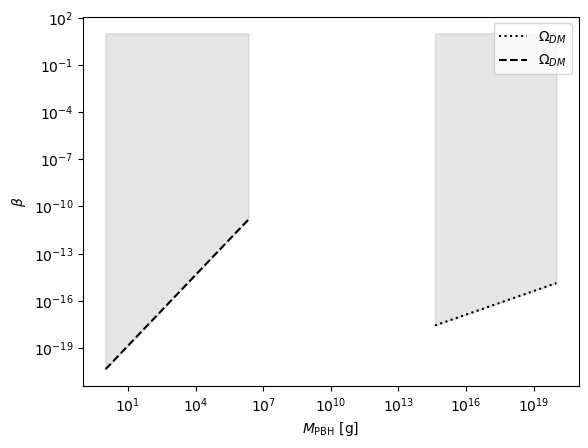

In [8]:
plt.loglog(M_n, betas_dm, "k:",label=r"$\Omega_{DM}$")
plt.fill_between(M_n, betas_dm, betas_dm*0+10, color='grey',alpha=0.2)
plt.loglog(M_relic, betas_relic, "k--",label=r"$\Omega_{DM}$")
plt.fill_between(M_relic, betas_relic, betas_relic*0+10, color='grey',alpha=0.2)

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")

plt.legend(ncol=1)
plt.show()

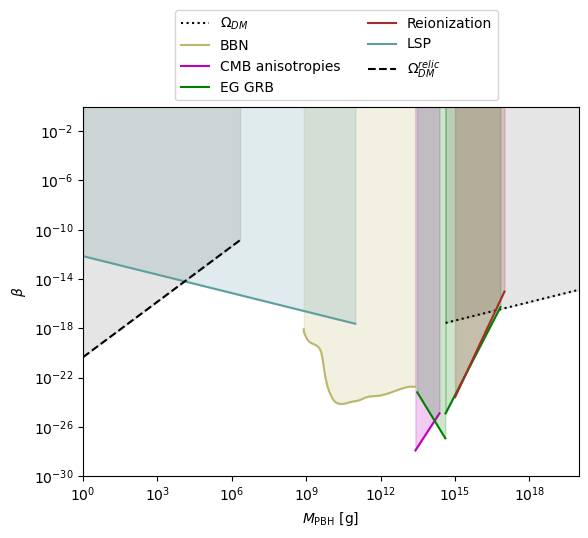

In [9]:
plt.loglog(M_n, betas_dm, "k:",label=r"$\Omega_{DM}$")
plt.fill_between(M_n, betas_dm, betas_dm*0+10, color='grey',alpha=0.2)

plt.loglog(M_bbn, betas_bbn, color = "darkkhaki",label = "BBN")
plt.fill_between(M_bbn, betas_bbn, betas_bbn*0+10, color='darkkhaki',alpha=0.2)

plt.loglog(M_an, betas_an, color='m', label = "CMB anisotropies")
plt.fill_between(M_an, betas_an, betas_an*0+10, color ="m",alpha=0.2)

plt.loglog(M_grb1, betas_grb1, color="g", label="EG GRB")
plt.fill_between(M_grb1, betas_grb1, betas_grb1*0+10, color='g',alpha=0.2)
plt.loglog(M_grb2, betas_grb2, color="g")
plt.fill_between(M_grb2, betas_grb2, betas_grb2*0+10, color='g',alpha=0.2)

plt.loglog(M_reio, betas_reio, color = "brown", label = "Reionization")
plt.fill_between(M_reio, betas_reio, betas_reio*0+10, color='brown',alpha=0.2)

plt.loglog(M_lsp, betas_lsp, color = "cadetblue",label = "LSP")
plt.fill_between(M_lsp, betas_lsp, betas_lsp*0+10, color='cadetblue',alpha=0.2)

plt.loglog(M_relic, betas_relic, "k--",label=r"$\Omega_{DM}^{relic}$")
plt.fill_between(M_relic, betas_relic, betas_relic*0+10, color='grey',alpha=0.2)

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.xlim([1,1e20])
plt.ylim([1e-30,1])

plt.legend(ncol=2,bbox_to_anchor=(.85, 1.28))
plt.show()

In [10]:
delta_c = 0.41

k_DM, P_k_DM = PfR.get_P_k_RD(M_n, betas_dm, delta_c)
k_BBN, P_k_BBN = PfR.get_P_k_RD(M_bbn, betas_bbn, delta_c)
k_AN, P_k_AN = PfR.get_P_k_RD(M_an, betas_an, delta_c)
k_GRB1, P_k_GRB1 = PfR.get_P_k_RD(M_grb1, betas_grb1, delta_c)
k_GRB2, P_k_GRB2 = PfR.get_P_k_RD(M_grb2, betas_grb2, delta_c)
k_Reio, P_k_Reio = PfR.get_P_k_RD(M_reio, betas_reio, delta_c)
k_LSP, P_k_LSP = PfR.get_P_k_RD(M_lsp, betas_lsp, delta_c)
k_DM_relic, P_k_DM_relic = PfR.get_P_k_RD(M_relic, betas_relic, delta_c)


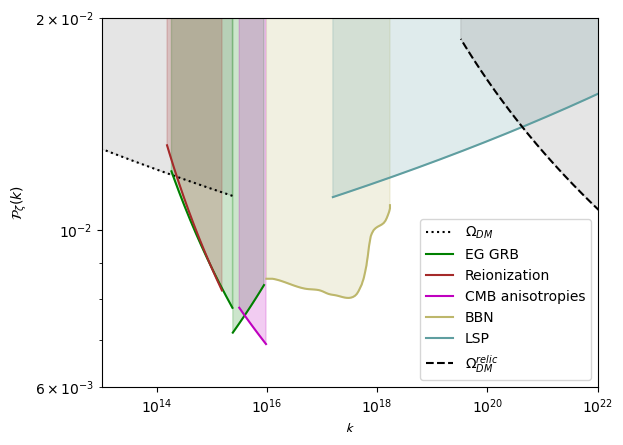

In [11]:
plt.loglog( k_DM, P_k_DM, "k:",label=r"$\Omega_{DM}$")
plt.fill_between(k_DM, P_k_DM, P_k_DM*0+10, color='grey',alpha=0.2)


plt.loglog(k_GRB1, P_k_GRB1, color = "g", label="EG GRB")
plt.fill_between(k_GRB1, P_k_GRB1, P_k_GRB1*0+10, color='g',alpha=0.2)

plt.loglog(k_GRB2, P_k_GRB2, color = "g")
plt.fill_between(k_GRB2, P_k_GRB2, P_k_GRB2*0+10, color='g',alpha=0.2)

plt.loglog(k_Reio, P_k_Reio, color = "brown",label = "Reionization")
plt.fill_between(k_Reio, P_k_Reio, P_k_Reio*0+10, color='brown',alpha=0.2)

plt.loglog(k_AN, P_k_AN, "m", label="CMB anisotropies")
plt.fill_between(k_AN, P_k_AN, P_k_AN*0+10, color='m',alpha=0.2)

plt.loglog(k_BBN, P_k_BBN, label="BBN",color = "darkkhaki")
plt.fill_between(k_BBN, P_k_BBN, P_k_BBN*0+10, color = "darkkhaki",alpha=0.2)

plt.loglog(k_LSP, P_k_LSP, color = "cadetblue",label = "LSP")
plt.fill_between(k_LSP, P_k_LSP, P_k_LSP*0+10, color='cadetblue',alpha=0.2)

plt.loglog(k_DM_relic, P_k_DM_relic, "k--",label=r"$\Omega_{DM}^{relic}$")
plt.fill_between(k_DM_relic, P_k_DM_relic, P_k_DM_relic*0+10, color='grey',alpha=0.2)


plt.xlabel(r"$\mathcal{k}$")
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
plt.xlim([1e13,1e22])
plt.ylim([6e-3,2e-2])
plt.legend()
plt.show()


In [12]:
k_rd, P_k_rd = PfR.get_P_k_RD(M_tot, betas_full, delta_c)

k_10s, P_k_10, beta_10 = PfM.get_P_k_MD(M_tot,10,0,1)
k_20s, P_k_20, beta_20 = PfM.get_P_k_MD(M_tot,20,0,1)
k_30s, P_k_30, beta_30 = PfM.get_P_k_MD(M_tot,30,0,1)

/Users/thaddaios/anaconda3/lib/python3.10/site-packages/PBHBeta/BfM.py:88: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 = beta0 * b * (1. - time / Delta_t) ** (1. / 3)
/Users/thaddaios/anaconda3/lib/python3.10/site-packages/PBHBeta/BfM.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  dy[1] = 3 ** (1. / 2) * M_pl / ((Om_0 + (1 - 3 * omega) * Om_ext - 4.) * np.exp(ln_rho) ** (1. / 2))


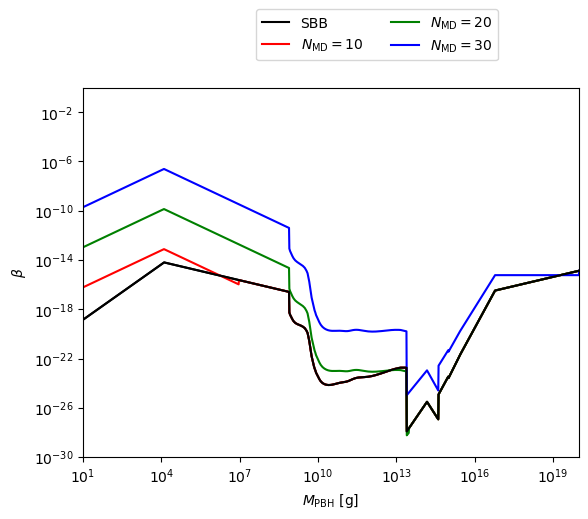

In [13]:
plt.loglog(M_tot,betas_full, label = "SBB", color='black')
plt.loglog(M_tot,beta_10, label = r"$N_{\rm MD}=10$",color='red')
plt.loglog(M_tot,beta_20, label = r"$N_{\rm MD}=20$",color='green')
plt.loglog(M_tot,beta_30, label = r"$N_{\rm MD}=30$",color='blue')
plt.loglog(M_tot,betas_full, color='black')
plt.ylim([1e-30,1])
plt.xlim([1e1,1e20])
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")

plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.23))
plt.show()

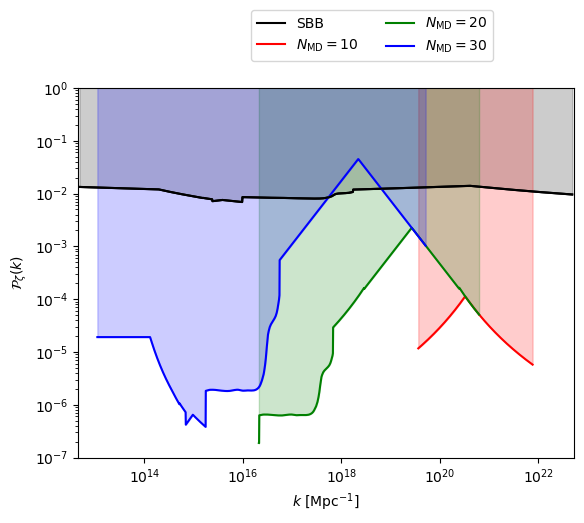

In [14]:
plt.loglog(k_rd, P_k_rd,label = "SBB",color='black')
plt.fill_between(k_rd, P_k_rd, P_k_rd*0+10, color='black',alpha=0.2)

plt.loglog(k_10s[:567], P_k_10[:567],color='red' ,label = r"$N_{\rm MD}=10$")
plt.fill_between(k_10s[:567], P_k_10[:567], P_k_10[:567]*0+10, color='red',alpha=0.2)

plt.loglog(k_20s[:816],P_k_20[:816], label = r"$N_{\rm MD}=20$", color='green')
plt.fill_between(k_20s[:816], P_k_20[:816], P_k_10[:816]*0+10, color='green',alpha=0.2)

plt.loglog(k_30s[:1351], P_k_30[:1351], label = r"$N_{\rm MD}=30$", color='blue')
plt.fill_between(k_30s[:1351], P_k_30[:1351], P_k_30[:1351]*0+10, color='blue',alpha=0.2)

plt.loglog(k_rd,P_k_rd,color='black')

plt.xlabel(r"$k~[\rm{Mpc}^{-1}]$")
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
plt.ylim([1e-7,1])
plt.xlim(0.45e13,5.3e22)
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.23))
plt.show()

In [15]:
k_phys_rad = np.array(PfS.k_rad(M_tot))

k_5st, P_k_5s, beta_s5 = PfS.get_P_k_SD(M_tot,5,1,1)
k_10st, P_k_10s, beta_s10 = PfS.get_P_k_SD(M_tot,10,1,1)
k_15st, P_k_15s, beta_s15 = PfS.get_P_k_SD(M_tot,15,1,1)

/Users/thaddaios/anaconda3/lib/python3.10/site-packages/PBHBeta/BfS.py:78: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/Users/thaddaios/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


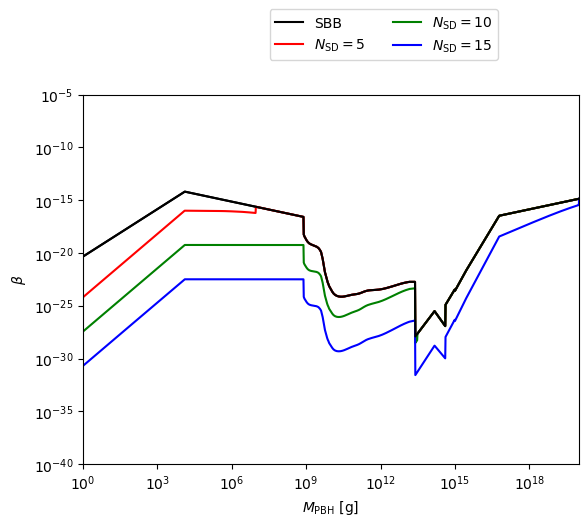

In [16]:
plt.loglog(M_tot,betas_full, color='black',label = "SBB")
plt.loglog(M_tot,beta_s5,label = r"$N_{\rm SD} = 5$", color='red')
plt.loglog(M_tot,beta_s10,label = r"$N_{\rm SD} = 10$", color='green')
plt.loglog(M_tot,beta_s15,label = r"$N_{\rm SD} = 15$", color='blue')
plt.loglog(M_tot,betas_full, color ='black')

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.ylim([1e-40,1e-5])
plt.xlim([1,1e20])

plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.25))


plt.show()

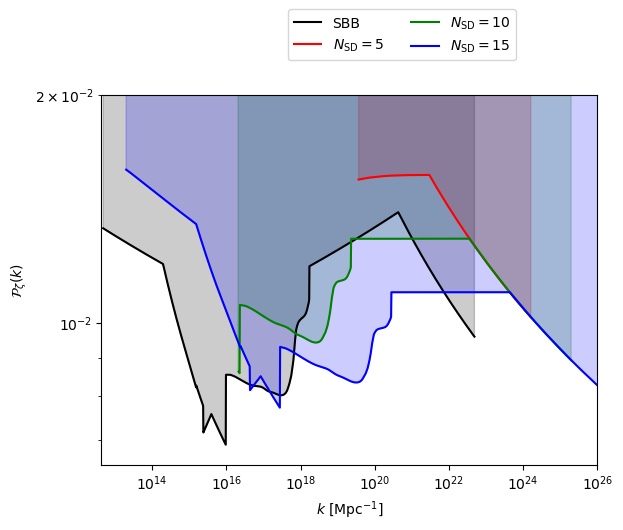

In [17]:
plt.loglog(k_phys_rad, P_k_rd, color='black', label = "SBB")
plt.fill_between(k_phys_rad, P_k_rd, [10]*len(P_k_rd), color='black',alpha=0.2)

plt.loglog(k_5st[:567],P_k_5s[:567], color='red', label = r"$N_{\rm SD}=5$")
plt.fill_between(k_5st[:567], P_k_5s[:567], P_k_5s[:567]*0+10, color='red',alpha=0.2)

plt.loglog(k_10st[:818],P_k_10s[:818], color='green',label = r"$N_{\rm SD}=10$")
plt.fill_between(k_10st[:820], P_k_10s[:820], P_k_10s[:820]*0+10, color='green',alpha=0.2)

plt.loglog(k_15st[:1320],P_k_15s[:1320], color='blue',label = r"$N_{\rm SD}=15$")
plt.fill_between(k_15st[:1320], P_k_15s[:1320], P_k_15s[:1320]*0+10, color='blue',alpha=0.2)


plt.xlabel(r"$k~[\rm{Mpc}^{-1}]$")
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
plt.ylim([6.5e-3,2e-2])
plt.xlim([4.3e12,1e26])
plt.ylabel(r"$\mathcal{P}_\zeta(k)$")
plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.25))

plt.show()